In [ ]:
//@version=5
indicator("GOLD  riskmanager by Sunstoic", overlay=true, max_labels_count=500, max_boxes_count=500)

// ─────── Inputs ────────────────────────────────
groupLevels = "Levels"
entryPrice = input.price(0, title = "Entry Price:", confirm = true, group = groupLevels)
stopPrice  = input.price(0, title = "Stop Price:", confirm = true, group = groupLevels)
tpPrice1   = input.price(0, title = "Take-Profit Price:", confirm = true, group = groupLevels)

// ─────── Account & Risk Settings ────────────────────────────────
groupAccount = "Account Settings"
capital = input.float(2000, "Account Capital", step = 1, group = groupAccount)
riskPercent = input.float(3, "Risk %", step = 0.1, group = groupAccount)
pipValue = input.float(0.01, "Tick Value (e.g. 0.01 for Gold)", step = 0.0001, group = groupAccount)

// ─────── Calculations ────────────────────────────────
slTicks = math.abs(entryPrice - stopPrice)
tp1Ticks = math.abs(tpPrice1 - entryPrice)

riskAmount = capital * (riskPercent / 100)
positionSize = riskAmount / (slTicks / pipValue)
positionSizeRounded = math.round(positionSize * 100) / 100  // 2 decimals

gain1 = (tp1Ticks / slTicks) * riskPercent

// format helper → show #.## consistently
fmt(x) => str.format("{0,number,#.##}", x)

// ─────── Draw Risk & Reward Boxes ────────────────────────────────
var box riskBox = na
var box rewardBox1 = na

if barstate.islast
    if not na(riskBox)
        box.delete(riskBox)
    if not na(rewardBox1)
        box.delete(rewardBox1)

    leftBar = bar_index + 2
    rightBar = bar_index + 5

    riskBox := box.new(left=leftBar, right=rightBar, top=math.max(entryPrice, stopPrice), bottom=math.min(entryPrice, stopPrice),bgcolor=color.new(color.red, 80), border_color=color.new(color.red, 0))

    if tpPrice1 != 0
        rewardBox1 := box.new(left=leftBar, right=rightBar, top=math.max(entryPrice, tpPrice1), bottom=math.min(entryPrice, tpPrice1),bgcolor=color.new(color.green, 80), border_color=color.new(color.green, 0))

// ─────── Labels for Prices ────────────────────────────────
var label lblEntry = na
var label lblSL = na
var label lblTP1 = na
var label lblInfo = na

if barstate.islast
    if not na(lblEntry)
        label.delete(lblEntry)
    if not na(lblSL)
        label.delete(lblSL)
    if not na(lblTP1)
        label.delete(lblTP1)
    if not na(lblInfo)
        label.delete(lblInfo)

    textClr = color.new(color.black, 0)
    smallFont = size.small

    lblEntry := label.new(bar_index + 5, entryPrice, "E1 " + str.tostring(entryPrice, format.mintick),style=label.style_label_left, color=color.new(color.silver, 100), textcolor=textClr, size=smallFont)
    lblSL := label.new(bar_index + 5, stopPrice, "S1 " + str.tostring(stopPrice, format.mintick),style=label.style_label_left, color=color.new(color.red, 100), textcolor=textClr, size=smallFont)
    if tpPrice1 != 0 
        lblTP1 := label.new(bar_index + 5, tpPrice1, "T1 " + str.tostring(tpPrice1, format.mintick),style=label.style_label_left, color=color.new(color.green, 100), textcolor=textClr, size=smallFont)

    infoText = 
       fmt(capital) + " Equity" + "\n" +
       fmt(riskAmount) + " (" + fmt(riskPercent) + "%)" + " Risk\n" +
       fmt(slTicks) + " SL ticks" + "\n" + 
       fmt(tp1Ticks) + " TP ticks" + "\n" +
       "1:" + fmt(tp1Ticks/slTicks) + " RRR" + "\n\n" +
       "        -" + fmt(riskPercent) + "%" + " Potential Loss\n" +
       "+" + fmt(gain1) + "%" + " Potential Gain\n" +
       fmt(positionSizeRounded) + " lot Bet Size"

    lblInfo := label.new(bar_index + 15, ((stopPrice + tpPrice1) / 2), infoText,style=label.style_label_left, color=color.new(#b3b6be, 100), textcolor=textClr, size=smallFont)

// ─────── Plot guide lines ────────────────────────────────
plot(entryPrice, "Entry", color=color.new(#919191, 0), style=plot.style_linebr )
plot(stopPrice, "Stop", color=color.new(color.red, 0), style=plot.style_linebr)
plot(tpPrice1, "TP1", color=color.new(color.green, 0), style=plot.style_linebr)


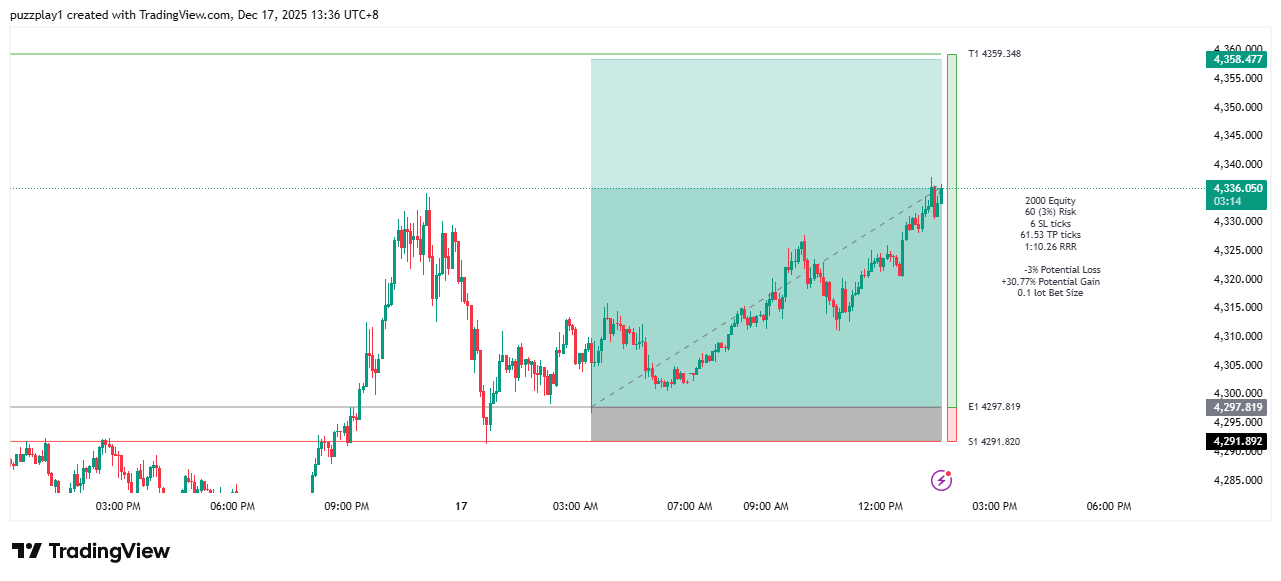